# CA1 - Used Car Prices

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sn

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

data = pd.read_csv('used_cars_UK.csv')
data.head(3)

,Unnamed: 0,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,0,SKODA Fabia,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,1,Vauxhall Corsa,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,2,Hyundai i30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN


In [4]:
data.shape

(3685, 14)

In [5]:
data.isnull().sum()

Unnamed: 0              0
title                   0
Price                   0
Mileage(miles)          0
Registration_Year       0
Previous Owners      1409
Fuel type               0
Body type               0
Engine                 45
Gearbox                 0
Doors                  25
Seats                  35
Emission Class         87
Service history      3145
dtype: int64

In [6]:
data.dtypes

Unnamed: 0             int64
title                 object
Price                  int64
Mileage(miles)         int64
Registration_Year      int64
Previous Owners      float64
Fuel type             object
Body type             object
Engine                object
Gearbox               object
Doors                float64
Seats                float64
Emission Class        object
Service history       object
dtype: object

In [7]:
# Keeping only the data I think I will need
df = data[['Price','Mileage(miles)','Registration_Year','Fuel type','Body type','Engine','Emission Class', 'Doors', 'Seats']]
df.shape

(3685, 9)

In [8]:
df.dropna()
df.rename(columns={'Mileage(miles)':'Mileage'}, inplace = True)

C:\Users\manua\AppData\Local\Temp\ipykernel_20628\2258436435.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Mileage(miles)':'Mileage'}, inplace = True)


In [9]:
df.isnull().sum()

Price                 0
Mileage               0
Registration_Year     0
Fuel type             0
Body type             0
Engine               45
Emission Class       87
Doors                25
Seats                35
dtype: int64

In [10]:
df.head()

,Price,Mileage,Registration_Year,Fuel type,Body type,Engine,Emission Class,Doors,Seats
0,6900,70189,2016,Diesel,Hatchback,1.4L,Euro 6,5.0,5.0
1,1495,88585,2008,Petrol,Hatchback,1.2L,Euro 4,3.0,5.0
2,949,137000,2011,Petrol,Hatchback,1.4L,Euro 5,5.0,5.0
3,2395,96731,2010,Petrol,Hatchback,1.4L,Euro 4,3.0,4.0
4,1000,85000,2013,Diesel,Hatchback,1.3L,Euro 5,5.0,5.0


In [11]:
#Convert engine and emmission class coumns from objects to floats
df['Engine'] = df['Engine'].str.replace('L','').astype(float)
df['Emission Class'] = df['Emission Class'].str.replace('Euro','').astype(float)
df.head()

C:\Users\manua\AppData\Local\Temp\ipykernel_20628\1522213598.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Engine'] = df['Engine'].str.replace('L','').astype(float)
C:\Users\manua\AppData\Local\Temp\ipykernel_20628\1522213598.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Emission Class'] = df['Emission Class'].str.replace('Euro','').astype(float)


,Price,Mileage,Registration_Year,Fuel type,Body type,Engine,Emission Class,Doors,Seats
0,6900,70189,2016,Diesel,Hatchback,1.4,6.0,5.0,5.0
1,1495,88585,2008,Petrol,Hatchback,1.2,4.0,3.0,5.0
2,949,137000,2011,Petrol,Hatchback,1.4,5.0,5.0,5.0
3,2395,96731,2010,Petrol,Hatchback,1.4,4.0,3.0,4.0
4,1000,85000,2013,Diesel,Hatchback,1.3,5.0,5.0,5.0


In [12]:
#Take out the rows where body type is minibus, pickup or combi van since there to few of them to affect the predictions
df = df[df['Body type'] != 'Minibus']
df = df[df['Body type'] != 'Pickup']
df = df[df['Body type'] != 'Combi Van']
df['Body type'].value_counts()

Body type
Hatchback      2279
SUV             460
Saloon          368
Estate          171
MPV             153
Coupe           139
Convertible     109
Name: count, dtype: int64

In [13]:
#Same as above for diesel hybrid fuel type
df = df[df['Fuel type'] != 'Diesel Hybrid']
df['Fuel type'].value_counts()

Fuel type
Petrol                   2360
Diesel                   1213
Petrol Hybrid              47
Electric                   31
Petrol Plug-in Hybrid      27
Name: count, dtype: int64

In [14]:
#One hot encode the body type and fuel type columns
df_encoded = pd.get_dummies(df, columns=['Body type', 'Fuel type' ], dtype=int)
df_encoded.head()

,Price,Mileage,Registration_Year,Engine,Emission Class,Doors,Seats,Body type_Convertible,Body type_Coupe,Body type_Estate,Body type_Hatchback,Body type_MPV,Body type_SUV,Body type_Saloon,Fuel type_Diesel,Fuel type_Electric,Fuel type_Petrol,Fuel type_Petrol Hybrid,Fuel type_Petrol Plug-in Hybrid
0,6900,70189,2016,1.4,6.0,5.0,5.0,0,0,0,1,0,0,0,1,0,0,0,0
1,1495,88585,2008,1.2,4.0,3.0,5.0,0,0,0,1,0,0,0,0,0,1,0,0
2,949,137000,2011,1.4,5.0,5.0,5.0,0,0,0,1,0,0,0,0,0,1,0,0
3,2395,96731,2010,1.4,4.0,3.0,4.0,0,0,0,1,0,0,0,0,0,1,0,0
4,1000,85000,2013,1.3,5.0,5.0,5.0,0,0,0,1,0,0,0,1,0,0,0,0


In [15]:
# Correleation matrix to determine the relationship of each column with the price
corr = df[['Price','Mileage','Registration_Year','Engine','Doors','Seats','Emission Class']].corr()
corr.style.background_gradient(cmap='coolwarm')

,Price,Mileage,Registration_Year,Engine,Doors,Seats,Emission Class
Price,1.000000,-0.501405,0.724100,-0.025631,0.114103,-0.027254,0.698161
Mileage,-0.501405,1.000000,-0.417775,0.331582,-0.037578,0.094896,-0.378797
Registration_Year,0.724100,-0.417775,1.000000,-0.294964,0.218046,0.036743,0.920135
Engine,-0.025631,0.331582,-0.294964,1.000000,-0.062359,0.071788,-0.266091
Doors,0.114103,-0.037578,0.218046,-0.062359,1.000000,0.497161,0.181947
Seats,-0.027254,0.094896,0.036743,0.071788,0.497161,1.000000,0.023472
Emission Class,0.698161,-0.378797,0.920135,-0.266091,0.181947,0.023472,1.000000


In [16]:
#Registration year has a stronger correlation to price than emission class so I drop emission class
df_encoded.drop('Emission Class', axis=1, inplace=True)
df_encoded.head()

,Price,Mileage,Registration_Year,Engine,Doors,Seats,Body type_Convertible,Body type_Coupe,Body type_Estate,Body type_Hatchback,Body type_MPV,Body type_SUV,Body type_Saloon,Fuel type_Diesel,Fuel type_Electric,Fuel type_Petrol,Fuel type_Petrol Hybrid,Fuel type_Petrol Plug-in Hybrid
0,6900,70189,2016,1.4,5.0,5.0,0,0,0,1,0,0,0,1,0,0,0,0
1,1495,88585,2008,1.2,3.0,5.0,0,0,0,1,0,0,0,0,0,1,0,0
2,949,137000,2011,1.4,5.0,5.0,0,0,0,1,0,0,0,0,0,1,0,0
3,2395,96731,2010,1.4,3.0,4.0,0,0,0,1,0,0,0,0,0,1,0,0
4,1000,85000,2013,1.3,5.0,5.0,0,0,0,1,0,0,0,1,0,0,0,0


In [17]:
df.describe()

,Price,Mileage,Registration_Year,Engine,Emission Class,Doors,Seats
count,3678.000000,3.678000e+03,3678.000000,3633.000000,3592.000000,3654.000000,3644.000000
mean,5778.056009,8.132374e+04,2011.830071,1.605423,4.909521,4.321292,4.899286
std,4469.013101,3.942320e+04,5.091942,0.486555,0.910289,0.987300,0.576328
min,400.000000,1.000000e+00,1953.000000,0.800000,1.000000,2.000000,2.000000
25%,2490.000000,5.698400e+04,2008.000000,1.300000,4.000000,3.000000,5.000000
50%,4000.000000,8.000000e+04,2012.000000,1.600000,5.000000,5.000000,5.000000
75%,7995.000000,1.030000e+05,2015.000000,1.900000,6.000000,5.000000,5.000000
max,33900.000000,1.110100e+06,2023.000000,6.300000,6.000000,5.000000,7.000000


<Axes: xlabel='Registration_Year', ylabel='Price'>

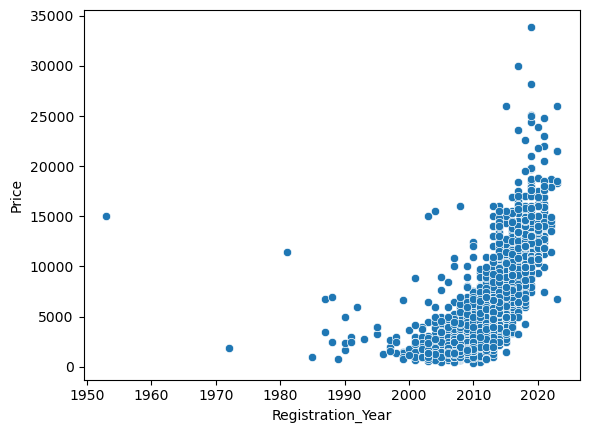

In [18]:
sn.scatterplot(x='Registration_Year', 
                y='Price', data=df) 

<Axes: xlabel='Engine', ylabel='Price'>

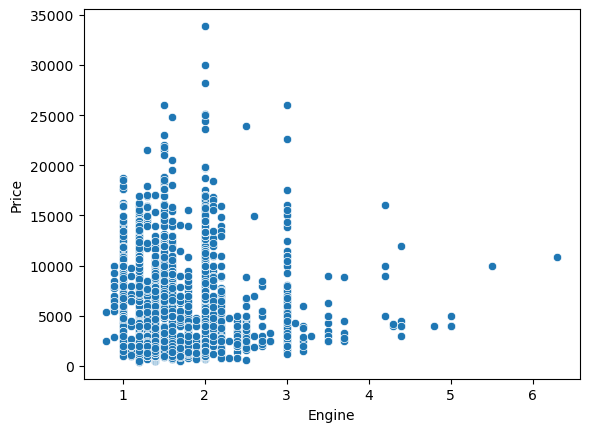

In [19]:
sn.scatterplot(x='Engine', 
                y='Price', data=df) 

<Axes: xlabel='Body type', ylabel='Price'>

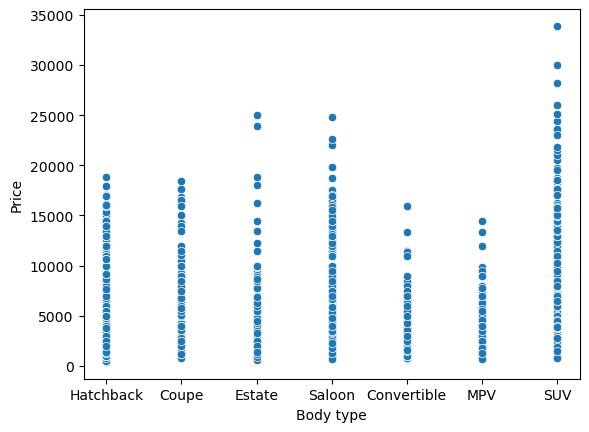

In [20]:
sn.scatterplot(x='Body type', 
                y='Price', data=df) 

<Axes: xlabel='Fuel type', ylabel='Price'>

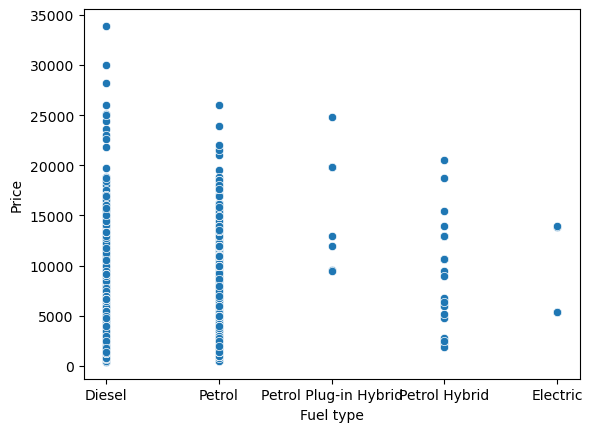

In [21]:
sn.scatterplot(x='Fuel type', 
                y='Price', data=df) 

<Axes: xlabel='Mileage', ylabel='Price'>

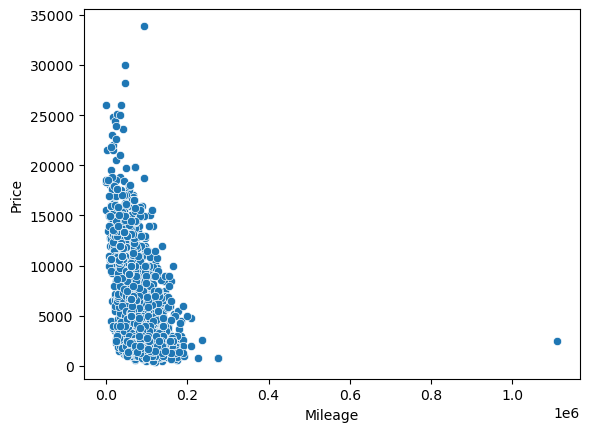

In [22]:
sn.scatterplot(x='Mileage', 
                y='Price', data=df) 

In [23]:
feature_names=[
    'Mileage',
    'Engine',
    'Registration_Year',
]
target_name = 'Price'

X = df[feature_names]
y = df[target_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.describe()

,Mileage,Engine,Registration_Year
count,2.758000e+03,2724.000000,2758.000000
mean,8.093451e+04,1.601762,2011.898115
std,4.057164e+04,0.477712,4.937931
min,1.000000e+00,0.800000,1972.000000
25%,5.685875e+04,1.200000,2008.000000
50%,7.906700e+04,1.600000,2012.000000
75%,1.020000e+05,1.900000,2016.000000
max,1.110100e+06,5.500000,2023.000000


In [24]:
scaler = MinMaxScaler()
scaler.set_output(transform="pandas")
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_train_scaled.describe()

,Mileage,Engine,Registration_Year
count,2758.000000,2724.000000,2758.000000
mean,0.072907,0.170588,0.782316
std,0.036548,0.101641,0.096822
min,0.000000,0.000000,0.000000
25%,0.051219,0.085106,0.705882
50%,0.071224,0.170213,0.784314
75%,0.091883,0.234043,0.862745
max,1.000000,1.000000,1.000000


array([[<Axes: title={'center': 'Mileage'}>,
        <Axes: title={'center': 'Engine'}>],
       [<Axes: title={'center': 'Registration_Year'}>, <Axes: >]],
      dtype=object)

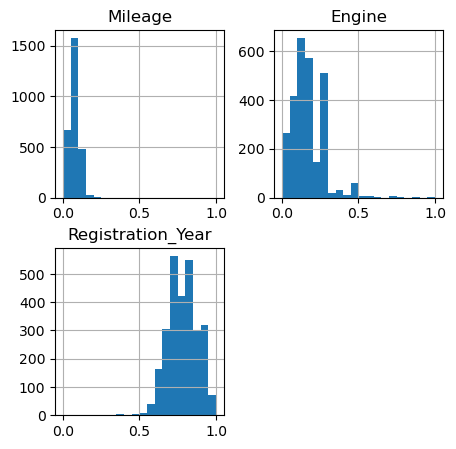

In [25]:
X_train_scaled.hist(bins=20, figsize=(5, 5))